### Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

%matplotlib inline

### Data

In [2]:
data=pd.read_csv('creditcard.csv')


### Explaratory Data Analysis

In [3]:
data["APPROVED"]=np.where(data["APPROVED"]==1, 'Yes', 'No')

data.head(4)

,CUST_ID,BALANCE,CREDIT_LIMIT,TENURE,APPROVED
0,C10001,40.900749,1000,12,Yes
1,C10002,3202.467416,7000,12,Yes
2,C10003,2495.148862,7500,12,Yes
3,C10004,1666.670542,7500,12,Yes


In [4]:
data2 = data.drop('APPROVED', axis=1)
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BALANCE,250.0,2550.066538,2975.817373,0.0,339.960213,1592.378426,3613.406343,19043.13856
CREDIT_LIMIT,250.0,6308.200000,4635.661787,900.0,2500.000000,5400.000000,8500.000000,23000.00000
TENURE,250.0,11.736000,0.974733,6.0,12.000000,12.000000,12.000000,12.00000


In [5]:
list(data.columns)

['CUST_ID', 'BALANCE', 'CREDIT_LIMIT', 'TENURE', 'APPROVED']

In [6]:
data.shape

(250, 5)

In [7]:
data.isna().sum()

CUST_ID         0
BALANCE         0
CREDIT_LIMIT    0
TENURE          0
APPROVED        0
dtype: int64

In [8]:
data.tail(4)

,CUST_ID,BALANCE,CREDIT_LIMIT,TENURE,APPROVED
246,C10255,435.862142,12000,12,Yes
247,C10256,6.390383,1500,12,Yes
248,C10257,9612.215120,12000,12,Yes
249,C10258,7938.559134,12500,12,Yes


### Data Visualization

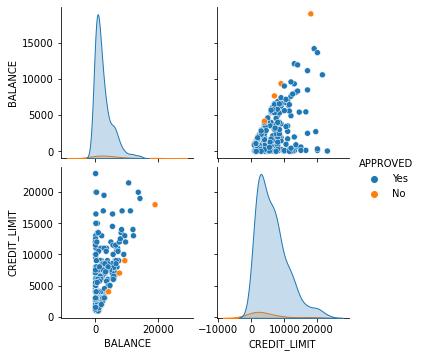

In [9]:
sns.pairplot(data=data, vars=['BALANCE', 'CREDIT_LIMIT'], hue='APPROVED')

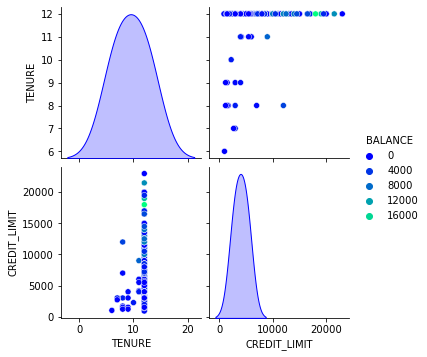

In [10]:
sns.pairplot(data=data, vars=['TENURE', 'CREDIT_LIMIT'], hue='BALANCE', palette='winter')

# plots are same but just different place
# sns.pairplot(data[['CREDIT_LIMIT', 'TENURE', 'BALANCE']], hue='BALANCE')
# plt.show()

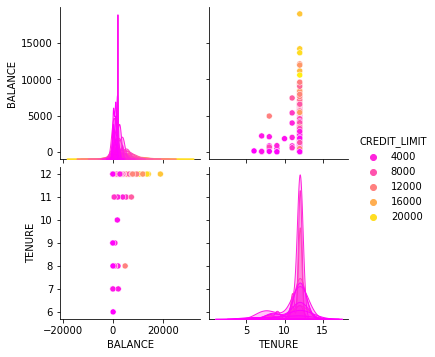

In [11]:
sns.pairplot(data=data, vars=['BALANCE', 'TENURE'], hue='CREDIT_LIMIT', palette='spring')

<AxesSubplot:xlabel='BALANCE', ylabel='CREDIT_LIMIT'>

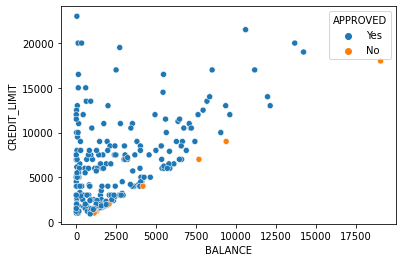

In [12]:
sns.scatterplot(data=data, x='BALANCE', y='CREDIT_LIMIT', hue='APPROVED')

### Train Test Split

In [13]:
X=data.drop(["APPROVED", 'CUST_ID'],axis=1)
y=data['APPROVED']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

### Standardize the Variables
Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of
the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and
hence on the KNN classifier, than variables that are on a small scale

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [17]:
pred=knn.predict(X_test)

### Evaluation

In [18]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          No       1.00      0.20      0.33         5
         Yes       0.94      1.00      0.97        58

    accuracy                           0.94        63
   macro avg       0.97      0.60      0.65        63
weighted avg       0.94      0.94      0.92        63



In [19]:
print(confusion_matrix(y_test, pred))

# print(y_test.values)

[[ 1  4]
 [ 0 58]]


### Cross Validation

In [20]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url='https://scikit-learn.org/stable/_images/grid_search_cross_validation.png', width=800, height=900)

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


In [22]:
neighbors=list(range(1,50))
cv_score=[]
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_score.append(score.mean())
cv_score

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\si

[0.968421052631579,
 0.9625730994152046,
 0.968421052631579,
 0.968421052631579,
 0.9631578947368421,
 0.9631578947368421,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579]

In [23]:
# determining best k
optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print("The optimal number of neighbors is {}".format(optimal_k))
# plot accuracy vs k
plt.plot(neighbors, cv_scores)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Accuracy")
plt.show()



NameError: name 'cv_scores' is not defined

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train, y_train)



In [ ]:
pred = knn.predict(X_test)

In [ ]:
print(classification_report(y_test,pred))

In [ ]:
print(confusion_matrix(y_test,pred))

In [ ]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X_train, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()


In [ ]:
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X_train, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.axhline(y=15, color='r', linestyle='--')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
pred = hc.fit_predict(X)



In [ ]:
data['APPROVED'] = pred
data.head(4)

In [ ]:
data['APPROVED'].value_counts()

In [ ]:
sns.pairplot(data, hue='APPROVED', palette='rainbow')

In [ ]:
sns.scatterplot("BALANCE", "CREDIT_LIMIT",data=data,hue="APPROVED", palette = 'summer')

